In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
FileAddress = 'VAST-Challenge-2022\Datasets\Activity Logs\ParticipantStatusLogs1.csv'
df=pd.read_csv(FileAddress)
df.head()

,timestamp,currentLocation,participantId,currentMode,hungerStatus,sleepStatus,apartmentId,availableBalance,jobId,financialStatus,dailyFoodBudget,weeklyExtraBudget
0,2022-03-01T00:00:00Z,POINT (-2724.6277665310454 6866.2081834436985),0,AtHome,JustAte,Sleeping,926.0,1286.519556,254,Stable,12,1104.302570
1,2022-03-01T00:00:00Z,POINT (-1526.9372331431534 5582.2951345645315),1,AtHome,JustAte,Sleeping,928.0,860.574204,929,Stable,12,926.714377
2,2022-03-01T00:00:00Z,POINT (-1360.9905987829304 2108.804385379679),2,AtHome,JustAte,Sleeping,291.0,1298.184541,348,Stable,16,848.802876
3,2022-03-01T00:00:00Z,POINT (-1558.517200825967 5600.664347152427),3,AtHome,JustAte,Sleeping,1243.0,1180.641725,316,Stable,12,819.325405
4,2022-03-01T00:00:00Z,POINT (976.2409614204214 4574.575079082071),4,AtHome,JustAte,Sleeping,194.0,-681.650588,177,Unstable,20,0.000000


In [18]:
df.drop(columns=['timestamp',
                    'hungerStatus',
                    'sleepStatus',
                    'availableBalance',
                    'jobId',
                    'financialStatus',
                    'dailyFoodBudget',
                    'weeklyExtraBudget'],axis=0, inplace=True)
df.drop(df[df['currentMode'] != 'AtHome'].index, inplace = True) #Only AtHome location
df.drop(columns=['currentMode'],axis=0, inplace=True)
df.head()

,currentLocation,participantId,apartmentId
0,POINT (-2724.6277665310454 6866.2081834436985),0,926.0
1,POINT (-1526.9372331431534 5582.2951345645315),1,928.0
2,POINT (-1360.9905987829304 2108.804385379679),2,291.0
3,POINT (-1558.517200825967 5600.664347152427),3,1243.0
4,POINT (976.2409614204214 4574.575079082071),4,194.0


In [19]:
df['currentLocation'] = df['currentLocation'].str.replace('POINT', '')
df['currentLocation'] = df['currentLocation'].str.replace('(', '')
df['currentLocation'] = df['currentLocation'].str.replace(')', '')
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\2846451013.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['currentLocation'] = df['currentLocation'].str.replace('(', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\2846451013.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['currentLocation'] = df['currentLocation'].str.replace(')', '')


,currentLocation,participantId,apartmentId
0,-2724.6277665310454 6866.2081834436985,0,926.0
1,-1526.9372331431534 5582.2951345645315,1,928.0
2,-1360.9905987829304 2108.804385379679,2,291.0
3,-1558.517200825967 5600.664347152427,3,1243.0
4,976.2409614204214 4574.575079082071,4,194.0


In [20]:
df['DummyX'], df['DummyY'] = df['currentLocation'].str.split(' ', 1).str #clear first ' ' 
df['X'], df['Y'] = df['DummyY'].str.split(' ', 1).str
df.drop(columns=['currentLocation','DummyX','DummyY'],axis=0, inplace=True)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\1746722918.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['DummyX'], df['DummyY'] = df['currentLocation'].str.split(' ', 1).str #clear first ' '
C:\Users\Admin\AppData\Local\Temp\ipykernel_12976\1746722918.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['X'], df['Y'] = df['DummyY'].str.split(' ', 1).str


,participantId,apartmentId,X,Y
0,0,926.0,-2724.6277665310454,6866.2081834436985
1,1,928.0,-1526.9372331431534,5582.2951345645315
2,2,291.0,-1360.9905987829304,2108.804385379679
3,3,1243.0,-1558.517200825967,5600.664347152427
4,4,194.0,976.2409614204214,4574.575079082071


In [21]:
df=df.drop_duplicates()
df=df.fillna(0) #NA -> 0
df=df.sort_values(by=['participantId'], ascending=True)
df

,participantId,apartmentId,X,Y
0,0,926.0,-2724.6277665310454,6866.2081834436985
1,1,928.0,-1526.9372331431534,5582.2951345645315
2,2,291.0,-1360.9905987829304,2108.804385379679
3,3,1243.0,-1558.517200825967,5600.664347152427
794650,4,136.0,1488.8432645870707,3503.579947354824
...,...,...,...,...
1006,1006,1633.0,-4227.972595816516,5315.296143771051
1007,1007,1620.0,-3964.6025264990335,6565.967796707195
1008,1008,525.0,-2153.571909256819,2521.0884089647766
1009,1009,663.0,-2362.9727109189403,4883.851861188674


In [22]:
df.dtypes

participantId      int64
apartmentId      float64
X                 object
Y                 object
dtype: object

In [23]:
df=df.astype({'X': float,'Y': float})

In [24]:
df.dtypes

participantId      int64
apartmentId      float64
X                float64
Y                float64
dtype: object

In [25]:
dfNA = df.copy()
dfNA.drop(dfNA[dfNA['apartmentId'] != 0].index, inplace = True) #Only apartmentId = 0(NA)
dfNA.head()

,participantId,apartmentId,X,Y
44,44,0.0,592.686562,626.014992
127,127,0.0,52.046324,1113.061244
141,141,0.0,-2010.897184,1966.574195
142,142,0.0,-1518.528569,1161.963168
154,154,0.0,1259.400866,1350.555050


In [26]:
dfHome = df.copy()
dfHome.drop(dfHome[dfHome['apartmentId'] == 0].index, inplace = True) #Only apartmentId = 0(NA)
dfHome.head()

,participantId,apartmentId,X,Y
0,0,926.0,-2724.627767,6866.208183
1,1,928.0,-1526.937233,5582.295135
2,2,291.0,-1360.990599,2108.804385
3,3,1243.0,-1558.517201,5600.664347
794650,4,136.0,1488.843265,3503.579947


In [27]:
"""df.to_csv(r'ProfileApartment.csv', index=False)
dfNA.to_csv(r'NAApartment.csv', index=False)
dfHome.to_csv(r'HomeApartment.csv', index=False)
"""

"df.to_csv(r'ProfileApartment.csv', index=False)\ndfNA.to_csv(r'NAApartment.csv', index=False)\ndfHome.to_csv(r'HomeApartment.csv', index=False)\n"

In [28]:
dftest = dfHome.iloc[:5]
dftest


,participantId,apartmentId,X,Y
0,0,926.0,-2724.627767,6866.208183
1,1,928.0,-1526.937233,5582.295135
2,2,291.0,-1360.990599,2108.804385
3,3,1243.0,-1558.517201,5600.664347
794650,4,136.0,1488.843265,3503.579947


<AxesSubplot:xlabel='X', ylabel='Y'>

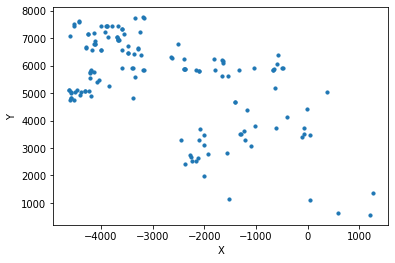

In [32]:
dfNA.plot.scatter(x = 'X', y = 'Y',s=10)

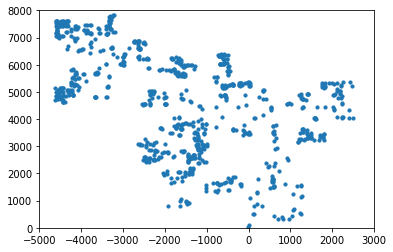

In [34]:
plt.scatter(dfHome.X, dfHome.Y,s=10)
plt.xlim(-5000, 3000)
plt.ylim(0, 8000)
plt.show()